In [8]:
!pip install yolov5

     ------------------------------------- 956.3/956.3 kB 20.1 MB/s eta 0:00:00
  Using cached GitPython-3.1.31-py3-none-any.whl (184 kB)
  Using cached huggingface_hub-0.13.4-py3-none-any.whl (200 kB)
     ---------------------------------------- 56.2/56.2 kB ? eta 0:00:00
  Using cached thop-0.1.1.post2209072238-py3-none-any.whl (15 kB)
  Using cached opencv_python-4.7.0.72-cp37-abi3-win_amd64.whl (38.2 MB)
     ---------------------------------------- 88.3/88.3 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 101.0/101.0 kB ? eta 0:00:00
     ---------------------------------------- 135.6/135.6 kB ? eta 0:00:00
     --------------------------------------- 10.6/10.6 MB 40.9 MB/s eta 0:00:00
     ---------------------------------------- 79.6/79.6 kB ? eta 0:00:00
  Using cached wget-3.2-py3-none-any.whl
  Using cached requests_toolbelt-0.10.1-py2.py3-none-any.whl 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-datasets 4.8.3 requires dm-tree, which is not installed.
tensorflow-datasets 4.8.3 requires promise, which is not installed.
google-api-python-client 2.80.0 requires uritemplate<5,>=3.0.1, which is not installed.
apache-beam 2.45.0 requires crcmod<2.0,>=1.7, which is not installed.
apache-beam 2.45.0 requires objsize<0.7.0,>=0.6.1, which is not installed.
apache-beam 2.45.0 requires orjson<4.0, which is not installed.
apache-beam 2.45.0 requires proto-plus<2,>=1.7.1, which is not installed.
apache-beam 2.45.0 requires pydot<2,>=1.2.0, which is not installed.
apache-beam 2.45.0 requires pymongo<4.0.0,>=3.8.0, which is not installed.
apache-beam 2.45.0 requires zstandard<1,>=0.18.0, which is not installed.
tensorflow 2.10.0 requires libclang>=13.0.0, which is not installed.
tensorflow 2.10.0 requires tens

In [3]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import pyautogui
import uuid
import os
import time

In [9]:
model = torch.hub.load('yolov5', 'yolov5s', source='local')

ImportError: cannot import name '_get_cpp_backtrace' from 'torch._C' (c:\Users\chris\Anaconda3\envs\venv\lib\site-packages\torch\_C.cp39-win_amd64.pyd)

In [9]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
# labels = ['left_obs', 'right_obs', 'timberman']
number_imgs = 50
time.sleep(3)
for img_num in range(number_imgs): 
    print('Collecting image number {}'.format(img_num))

    screen = pyautogui.screenshot()
    screen_array = np.array(screen)
    cropped_region = screen_array[360:720,640:1280,:]
    
    imgname = os.path.join(IMAGES_PATH, str(uuid.uuid1())+'.jpg')
    corrected_colors = cv2.cvtColor(cropped_region, cv2.COLOR_RGB2BGR)
    cv2.imwrite(imgname, corrected_colors)
    time.sleep(0.5)
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [19]:
!python .\labelImg\labelImg.py


Not find:/data/predefined_classes.txt (optional)
[('front', [(127, 23), (159, 23), (159, 128), (127, 128)], None, None, False), ('player', [(72, 23), (219, 23), (219, 254), (72, 254)], None, None, False)]
[('front', [(127, 23), (159, 23), (159, 128), (127, 128)], None, None, False), ('player', [(72, 23), (219, 23), (219, 254), (72, 254)], None, None, False)]
[('back', [(307, 66), (356, 66), (356, 130), (307, 130)], None, None, False), ('player', [(261, 42), (374, 42), (374, 241), (261, 241)], None, None, False)]
[('front', [(88, 51), (152, 51), (152, 122), (88, 122)], None, None, False), ('player', [(65, 15), (177, 15), (177, 296), (65, 296)], None, None, False)]
[('front', [(395, 19), (458, 19), (458, 96), (395, 96)], None, None, False), ('player', [(362, 1), (471, 1), (471, 311), (362, 311)], None, None, False)]


In [ ]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 2000 --data dataset.yml --hyp hyp.scratch.yaml --weights yolov5s.pt --workers 2

In [6]:
#change path exp
model = torch.hub.load('yolov5', 'custom', source='local', path='yolov5/runs/train/exp13/weights/best.pt')

c:\Users\chris\Anaconda3\envs\venv\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


ImportError: cannot import name '_get_cpp_backtrace' from 'torch._C' (c:\Users\chris\Anaconda3\envs\venv\lib\site-packages\torch\_C.cp39-win_amd64.pyd)

In [13]:
img = os.path.join('data', 'images', '4ec22c72-bcb4-11ed-85db-6479f0c944fb.jpg')

In [14]:
results = model(img)

In [15]:
results.print()

image 1/1: 360x640 1 front, 1 person
Speed: 8.5ms pre-process, 52.8ms inference, 7.0ms NMS per image at shape (1, 3, 384, 640)


In [ ]:
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="lFIbQTAO1KP9itWTXDz6a50RY",
    project_name="vec",
    workspace="kiyoyoneko",
)

# Report multiple hyperparameters using a dictionary:
hyper_params = {
    "learning_rate": 0.5,
    "steps": 100000,
    "batch_size": 50,
}
experiment.log_parameters(hyper_params)

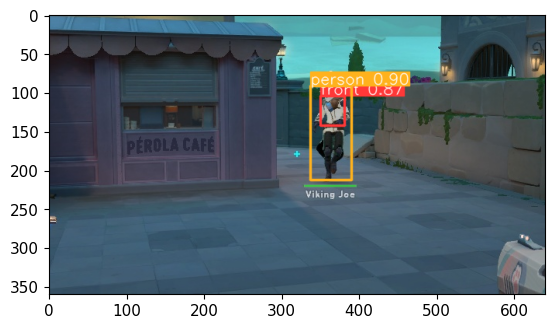

In [16]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [1]:
# Loop over the frames
while True: 
    # Take a screenshot 
    screen = pyautogui.screenshot()
    # Convert the output to a numpy array
    screen_array = np.array(screen)
    # Crop out the region we want - height, width, channels   
    cropped_region = screen_array[:360,1280:,:]
    # Convert the color channel order
    corrected_colors = cv2.cvtColor(cropped_region, cv2.COLOR_RGB2BGR)
    
    # Make detections 
    results = model(corrected_colors)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))

    # Cv2.waitkey
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
# Close down the frame
cv2.destroyAllWindows()

NameError: name 'pyautogui' is not defined

In [ ]:
img = 'https://variety.com/wp-content/uploads/2022/09/Genshin-Impact-Anime-Series-Concept.png'

In [ ]:
results = model(img)
results.print()

In [ ]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
print(results.crop()[0]['box'][0].item())
print(type(results.crop()[0]['box'][0]))
plt.show()